# POSTTEST 6 Kecerdasan Buatan
### NIM : 2209106012
### NAMA : Aldi Solihin
### KELAS : A1 2022

### Import Paket Pandas dan Membaca Dataset
Agar bisa menggunakan paket pandas kita  perlu melakukan import paket terlebih dahulu, dan kita dapar mengimpor pandas sebagai pd agar lebih singkat, numpy sebagai np. Kemudian dari sklearn.model_selection kita mengimport train_test_split untuk membagi dataset. Kita juga mengimpor accuracy_score dari sklearn.metrics, MinMaxScaler dan LabelEncoder dari sklearn.preprocessing, serta Sequential, layers, dan callbacks dari tensorflow.keras. Setelah itu  kita deklarasikan DataFrame (df) dengan pd.read_csv untuk membaca file csv agar lebih mudah dan efisien.

In [351]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras import Sequential, layers, callbacks

In [352]:
df = pd.read_csv('ParisHousingClassNULL.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,NaN,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771.0,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,NaN
2,55712.0,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316.0,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429.0,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,NaN


## Data Cleaning  
Data Cleaning adalah proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.
### Data dengan nilai NULL
Pada bagian ini saya akan menangani nilai null dengan melakukan subsitusi nilai. Langkah pertama kita perlu mengimport SimpleImputer dari sklearn.impute terlebih dahulu. Dan mengecek nilai NULL pada data.

In [353]:
from sklearn.impute import SimpleImputer

In [354]:
# Mengecek Nilai NULL / yang kosong
df.isna().sum()

squareMeters         17
numberOfRooms         0
hasYard               0
hasPool               0
floors                0
cityCode              0
cityPartRange         0
numPrevOwners         0
made                  0
isNewBuilt            0
hasStormProtector     0
basement              0
attic                 0
garage                0
hasStorageRoom        0
hasGuestRoom          0
price                10
category             67
dtype: int64

### Pada bagian ini kita akan mensubsitusikan nilai NULL dengan median, mean, dan modus data.
Pertama kita deklarasikan si_median dengan strategy median, kemudian deklarasikan df dengan kolom yang akan kita subsitusikan nilai NULL nya contoh 'squareMeters' dan nilai null diisi dengan median dari kolom 'squareMeters'. Pada bagian ini saya menggunakan astype("int64") karena tipe data awal 'squareMeters' adalah integer, karena ada data yang kosong / bernilai null jadi tipe data berubah ke float, sehingga kita harus mengembalikan dengan menggunakan astype.

In [355]:
si_median = SimpleImputer(strategy='median')
df[['squareMeters']] = si_median.fit_transform(df[['squareMeters']]).astype("int64")

In [356]:
si_mean = SimpleImputer(strategy='mean')
df[['price']] = si_mean.fit_transform(df[['price']])

In [357]:
si_modus = SimpleImputer(strategy='most_frequent')
df[['category']] = si_modus.fit_transform(df[['category']])

Setelah dilakukan subsitsi nilai, kita mengecek lagi apakah sudah tidak ada nilai NULL pada dataset.

In [358]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

### Data dengan nilai duplikat
Tahap pertama kita akan mengecek data yang duplikat dengan df.duplicated().sum() yang akan menghitung berapa banyak data yang duplikat.

In [359]:
df.duplicated().sum()

2

In [360]:
df.drop_duplicates(inplace=True)

### Melakukan Train Split Data

In [361]:
X = df.drop(['category'], axis=1)
y = df['category']

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

`X = df.drop(['category'], axis=1)` : Perintah ini mendeklarasikan variabel X, yang berisi DataFrame 'df' setelah menghapus kolom 'category' dengan menggunakan metode 'drop'.

`y = df['category']` : Perintah ini mendeklarasikan variabel y, yang berisi label atau target klasifikasi dari DataFrame 'df', yaitu kolom 'category'.

`X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)` : Perintah Ini menggunakan fungsi 'train_test_split' dari Scikit-Learn untuk membagi data menjadi data pelatihan dan data pengujian. Data 'X' dan 'y' dibagi menjadi 'X_train' (fitur pelatihan), 'X_test' (fitur pengujian), 'Y_train' (label pelatihan), dan 'Y_test' (label pengujian). Parameter 'test_size=0.2' menunjukkan bahwa 20% dari data akan digunakan sebagai data pengujian. 'random_state=42' digunakan untuk mengatur seed agar hasil pemisahan data dapat direproduksi.

### Scaling data dengan MinMaxScaler dan Label Encoding

In [362]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [363]:
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)

Y_test = le.transform(Y_test)

# 1. Sequential Model

In [364]:
X_train.shape

(8000, 17)

Bagian diatas digunakan untuk mengetahui shape dari X_train yang kemudian akan digunakan pada Sequential model tepatnya pada input_shape

In [365]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[17]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

`model = Sequential([...])` : Perintah Ini mendefinisikan model jaringan saraf tiruan sebagai urutan lapisan (layers) dengan menggunakan Sequential. Model ini terdiri dari dua lapisan Dense.

`layers.Dense(16, activation='relu', input_shape=[17])` : Lapisan pertama terdiri dari 16 neuron (unit) dengan fungsi aktivasi ReLU (Rectified Linear Unit) dan menerima input dengan bentuk 17. Ini adalah lapisan input.

`layers.Dense(1, activation='sigmoid')` : Lapisan ketiga terdiri dari satu neuron dengan aktivasi sigmoid. Ini adalah lapisan output yang menghasilkan output dalam bentuk probabilitas (untuk klasifikasi biner).

`model.compile(...)` : Perintah ini mengompilasi model. Parameter 'optimizer' disetel sebagai 'adam' yang merupakan algoritma optimasi yang umum digunakan. 'loss' diatur sebagai 'binary_crossentropy' yang sesuai untuk masalah klasifikasi biner. 'metrics' = ['accuracy'] untuk memonitor akurasi selama pelatihan.

In [366]:
es = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

`callbacks.EarlyStopping` : Perintah callbacks digunakan untuk menerapkan melakukan pemberhentian epochs selama pelatihan model.

`monitor = 'val_accuracy'` : Perintah ini mengatur parameter yang dimonitor selama pelatihan, dalam hal ini, akurasi validasi (validation accuracy). Pelatihan akan berhenti jika akurasi validasi tidak meningkat.

`patience = 5`: Adalah jumlah epoch yang harus dilewati, jika tidak ada peningkatan dalam metrik yang dimonitor sebelum pelatihan dihentikan. Dalam hal ini, pelatihan akan berhenti setelah 5 epoch tanpa peningkatan akurasi validasi.

`verbose = 1` : Verbose mengatur tingkat verbosity selama pelatihan. Jika diatur sebagai 1, akan mencetak pesan saat train dihentikan.

`restore_best_weights = True` : Jika diatur sebagai `True`, bagian ini akan mengembalikan weights model ke bobot terbaik yang ditemukan selama pelatihan ketika callbacks terjadi. Ini membantu untuk mempertahankan model dengan kinerja terbaik.

In [367]:
history = model.fit(X_train, Y_train, epochs = 50,validation_split=0.2, callbacks=[es])

Epoch 1/50


200/200 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.8669 - val_loss: 0.3491 - val_accuracy: 0.8731
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8783 - val_loss: 0.2485 - val_accuracy: 0.8844
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9127 - val_loss: 0.1859 - val_accuracy: 0.9362
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9505 - val_loss: 0.1482 - val_accuracy: 0.9463
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9645 - val_loss: 0.1217 - val_accuracy: 0.9663
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9755 - val_loss: 0.1029 - val_accuracy: 0.9706
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9833 - val_loss: 0.0879 - val_accuracy: 0.9781
Epoch 8/50
200/20

In [368]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


## Evaluasi Model

In [369]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9950


[0.03062623366713524, 0.9950000047683716]

Pada hasil evaluasi model diatas kita mendapatkan angka loss yaitu 0.0306 dan akurasi 0.9950

## Skor Akurasi

In [370]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

`y_pred` : Adalah matriks yang berisi probabilitas prediksi dari model. Biasanya, ini adalah output dari lapisan sigmoid pada model klasifikasi biner, yang menghasilkan probabilitas kelas positif.

`np.where(y_pred > 0.5, 1, 0)` : Kita menggunakan NumPy untuk mengubah probabilitas menjadi label biner. Jika probabilitas di atas 0.5, maka nilai diubah menjadi 1; jika probabilitas di bawah atau sama dengan 0.5, maka nilai diubah menjadi 0. Hasilnya adalah array yang berisi label biner.

`.reshape(-1)` : Perintah ini digunakan untuk mengubah bentuk array hasil sehingga menjadi satu dimensi.

In [ ]:
accuracy_score(Y_test, y_pred)

## Grafik
### 1. Model Accuracy 

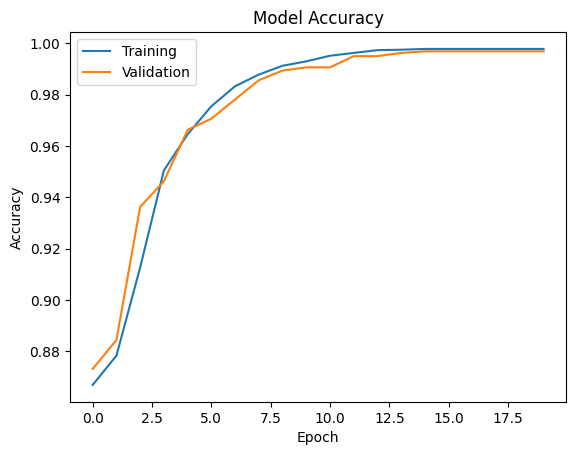

In [375]:
import matplotlib.pyplot as plt

plt.title("Model Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'])
plt.show()

Pada grafik akurasi diatas garis berwarna biru (Training) mewakili bagaimana akurasi model berkembang seiring dengan meningkatnya jumlah epoch. Semakin tinggi garis tersebut, semakin baik kinerja model pada data pelatihan.

Garis berwarna oranye (Validation) menggambarkan akurasi model pada set data validasi. Garis ini mencerminkan sejauh mana model umumnya mampu melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Jika garis ini mengikuti atau mendekati garis akurasi pelatihan artinya hasil validasi memiliki indikasi yang baik. 

### 2. Model Loss

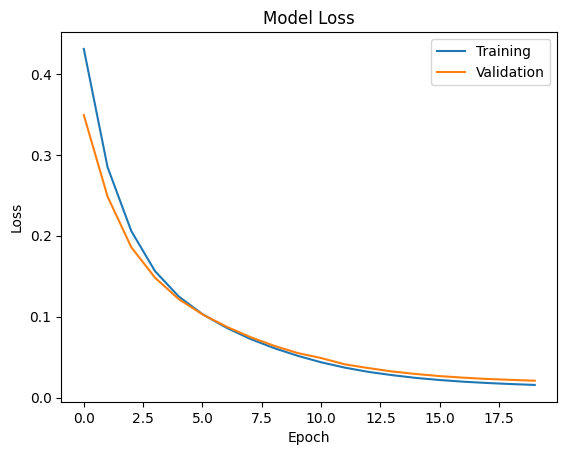

In [376]:
plt.title("Model Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])
plt.show()

Pada grafik model loss diatas garis berwarna biru (Training) menggambarkan loss model pada set data pelatihan. Garis ini mewakili bagaimana loss model berkembang seiring dengan meningkatnya jumlah epoch. Semakin rendah garis tersebut, semakin baik kinerja model pada data pelatihan.

Garis berwarna oranye (Validation) menggambarkan loss model pada set data validasi. Garis ini mencerminkan sejauh mana model umumnya mampu melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Jika garis ini mengikuti garis loss pelatihan, itu adalah indikasi baik, tetapi jika garis ini mulai meningkat, itu bisa menjadi tanda overfitting.